<a href="https://colab.research.google.com/github/esadausk/data_mining/blob/main/svm_on_suicide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import svm
from numpy import asarray
from mlxtend.plotting import plot_decision_regions

In [2]:
#Suicide data
url = 'https://raw.githubusercontent.com/VitaT/ML-python/main/data/suicides.csv'
dataframe = pd.read_csv(url)
print(dataframe)

          ID     sex  ... gdp_per_capita ($)       generation
0          1    male  ...                796     Generation X
1          2    male  ...                796           Silent
2          3  female  ...                796     Generation X
3          4    male  ...                796  G.I. Generation
4          5    male  ...                796          Boomers
...      ...     ...  ...                ...              ...
27815  27816  female  ...               2309     Generation X
27816  27817  female  ...               2309           Silent
27817  27818    male  ...               2309     Generation Z
27818  27819  female  ...               2309     Generation Z
27819  27820  female  ...               2309          Boomers

[27820 rows x 11 columns]


In [3]:
#Data cleaning
dataframe.drop("ID", axis = 1, inplace = True) #useless
dataframe.drop("generation", axis = 1, inplace = True) #more uselful to use age groups then generation names
dataframe.drop('suicides/100k pop', axis = 1, inplace = True) #counted from suicides_no - repeat of information
dataframe.drop('HDI for year', axis=1, inplace = True) #a lot of missing points
dataframe.columns = ['sex', 'age', 'suicide_num', 'population', 'country_year', 'GDP_per_year', 'GDP_per_capita']

print('Uniq values and frequencies:\n',dataframe['country_year'].value_counts())
new1=dataframe['country_year'].str.split('[a-zA-Z" "]+', n=1, expand = True)
dataframe['year']=new1[1]
new2=dataframe['country_year'].str.split('[0-9]+', n=1, expand = True)
dataframe['country']=new2[0]

dataframe.drop(columns=['country_year'], inplace=True)
print('Uniq values and frequencies:\n',dataframe['country'].value_counts())
print('Uniq values and frequencies:\n',dataframe['year'].value_counts())

Uniq values and frequencies:
 Ireland1999           12
Luxembourg1987        12
Greece1993            12
Bulgaria2000          12
Bahrain2002           12
                      ..
Armenia2016           10
Czech Republic2016    10
Hungary2016           10
Sweden2016            10
Iceland2016           10
Name: country_year, Length: 2321, dtype: int64
Uniq values and frequencies:
 Iceland                   382
Austria                   382
Mauritius                 382
Netherlands               382
Luxembourg                372
                         ... 
Bosnia and Herzegovina     24
Dominica                   12
Macau                      12
Cabo Verde                 12
Mongolia                   10
Name: country, Length: 101, dtype: int64
Uniq values and frequencies:
 2009    1068
2001    1056
2010    1056
2007    1032
2011    1032
2003    1032
2002    1032
2000    1032
2006    1020
2008    1020
2004    1008
2005    1008
1999     996
2012     972
2013     960
1998     948
2014     

In [4]:
print(dataframe.describe(include = ['int64', 'float64']))
print(dataframe.describe(include = ["object"]))

        suicide_num    population  GDP_per_year  GDP_per_capita
count  27820.000000  2.782000e+04  2.782000e+04    27820.000000
mean     242.574407  1.844794e+06  4.455810e+11    16866.464414
std      902.047917  3.911779e+06  1.453610e+12    18887.576472
min        0.000000  2.780000e+02  4.691962e+07      251.000000
25%        3.000000  9.749850e+04  8.985353e+09     3447.000000
50%       25.000000  4.301500e+05  4.811469e+10     9372.000000
75%      131.000000  1.486143e+06  2.602024e+11    24874.000000
max    22338.000000  4.380521e+07  1.812071e+13   126352.000000
          sex          age   year  country
count   27820        27820  27820    27820
unique      2            6     32      101
top      male  15-24 years   2009  Iceland
freq    13910         4642   1068      382


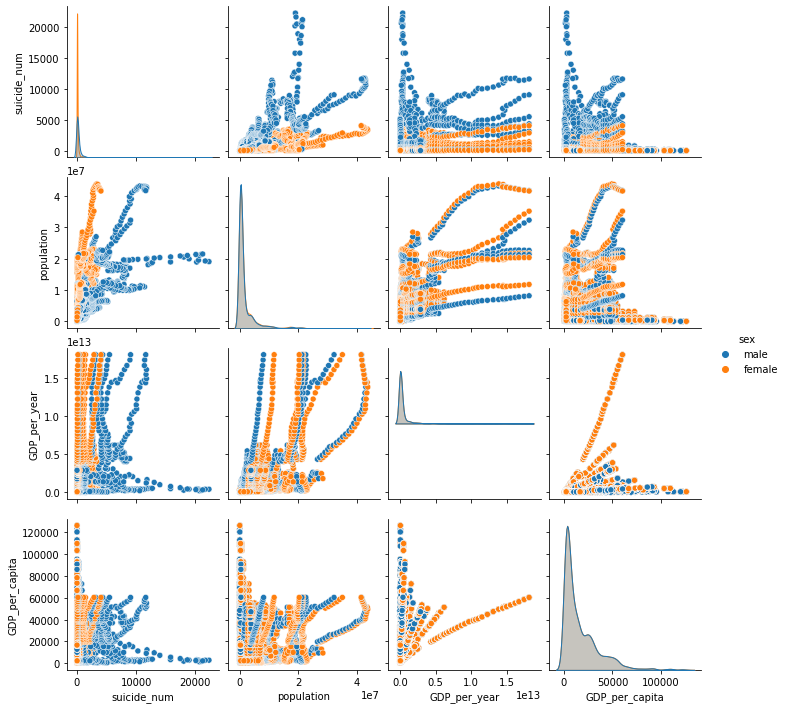

In [5]:
sns.pairplot(dataframe, hue='sex')

In [6]:
#Target sex
#Features suicide_num, GDP_per_year
dataframe.drop(['age', 'population', 'GDP_per_capita', 'year', 'country'], axis=1, inplace=True)


In [7]:
dataframe.sex.replace({'male':1,'female':0}, inplace=True)
print(dataframe)

       sex  suicide_num  GDP_per_year
0        1           21    2156624900
1        1           16    2156624900
2        0           14    2156624900
3        1            1    2156624900
4        1            9    2156624900
...    ...          ...           ...
27815    0          107   63067077179
27816    0            9   63067077179
27817    1           60   63067077179
27818    0           44   63067077179
27819    0           21   63067077179

[27820 rows x 3 columns]


In [8]:
target = dataframe['sex']
features = dataframe[['suicide_num', 'GDP_per_year']]

standfeatures = StandardScaler().fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(standfeatures, target, test_size=0.2, random_state = 42)

In [9]:
svc = svm.SVC(kernel = 'rbf', gamma = 0.1, C=100)
model = svc.fit(x_train, y_train)

In [10]:
predict = svc.predict(x_test)
metrics.accuracy_score(y_test, predict)

0.6062185478073329